# An exercise on biological modelling using Python

#### HIV Example

We will focus on a model of the viral load. Here V(t) is the concentration of virus. A, $\alpha$, B and $\beta$ are the paramterers. 

$$ V(t) = A exp(-\alpha t) + B exp(-\beta t) $$

### 1. Exploring the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
time = np.linspace(0, 10, 101)
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [3]:
def viral_load(A, alpha, B, beta):
    time = np.linspace(0, 10, 101)
    vt = A*np.exp(-1*alpha*time) + B*np.exp(-1*beta*time)
    plt.plot(time, vt)

In [4]:
# Exploring how each parameter affects the curve.
widgets.interact(viral_load, A=(-10, 10), alpha = (-1, 1,0.1), B = (-10, 10), beta = (-1, 1,0.1))

interactive(children=(IntSlider(value=0, description='A', max=10, min=-10), FloatSlider(value=0.0, description…

<function __main__.viral_load(A, alpha, B, beta)>

### 2. Data fitting through manual inspection

In [5]:
hiv_data = np.loadtxt('pmls-data/01-HIVseries/HIVseries.csv', delimiter=',')

In [6]:
days, viload = hiv_data[:,0], hiv_data[:,1]

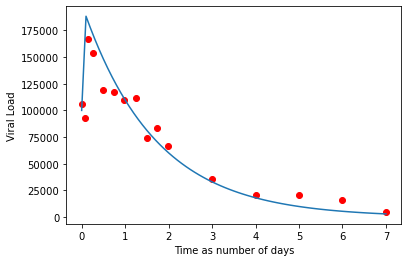

In [7]:
plt.plot(days, viload, 'ro')
plt.xlabel('Time as number of days')
plt.ylabel('Viral Load')

time_in_days = np.linspace(0, 7, 71)

# Manually adjust the parameters to fit the experimental data
A, alpha, B, beta = 2e5, 0.6, -1e5, 70
vt = A*np.exp(-1*alpha*time_in_days) + B*np.exp(-1*beta*time_in_days)

plt.plot(time_in_days, vt)

### 3. Another example on exploring the model

#### Genetic switching in bacteria

In [8]:
def V(tau):
    time = np.linspace(0, 2, 101)
    v = (1-np.exp(-1*time/tau))
    plt.plot(time, v)

def W(A, tau):
    time = np.linspace(0, 2, 101)
    w = A*(np.exp(-1*time/tau) -1 + time/tau)
    plt.plot(time, w)

widgets.interact(V, tau=(0.1, 2, 0.2))

interactive(children=(FloatSlider(value=0.9, description='tau', max=2.0, min=0.1, step=0.2), Output()), _dom_c…

<function __main__.V(tau)>

In [9]:
widgets.interact(W, A=(-10, 10), tau=(0.1, 2, 0.1))

interactive(children=(IntSlider(value=0, description='A', max=10, min=-10), FloatSlider(value=1.0, description…

<function __main__.W(A, tau)>

#### Practise plotting

Text(0.5, 1.0, 'Novick-Weiner experiment')

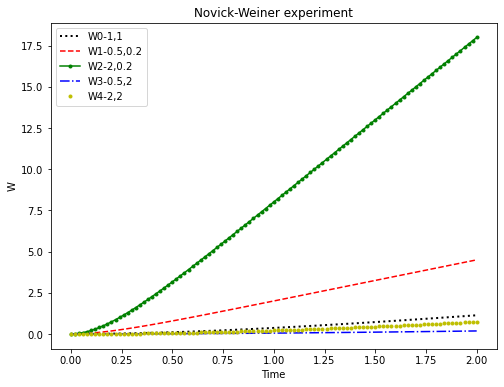

In [10]:
time = np.linspace(0, 2, 101)

def Vfunc(time, tau):
    v = (1-np.exp(-1*time/tau))
    return v

def Wfunc(time, A, tau):
    w = A*(np.exp(-1*time/tau) -1 + time/tau)
    return w

plt.figure(figsize = (8,6))
ax = plt.gca()
ax.plot(time, Wfunc(time, 1, 1), color='black', linewidth=2, linestyle='dotted') 
ax.plot(time, Wfunc(time, 0.5, 0.2), 'r--')
ax.plot(time, Wfunc(time, 2, 0.2), 'g.-')
ax.plot(time, Wfunc(time, 0.5, 2), 'b-.')
ax.plot(time, Wfunc(time, 2, 2), 'y.')
ax.set_xlabel('Time')
ax.set_ylabel('W')
ax.legend(('W0-1,1', 'W1-0.5,0.2', 'W2-2,0.2', 'W3-0.5,2', 'W4-2,2'))
ax.set_title('Novick-Weiner experiment')

### 4. Manual inspection and parameter guessing for model fitting

In [11]:
# Loading the data
novickA_data = np.loadtxt('pmls-data/15novick/g149novickA.csv', delimiter=',')
time_exp, V_exp = novickA_data[:,0], novickA_data[:,1]

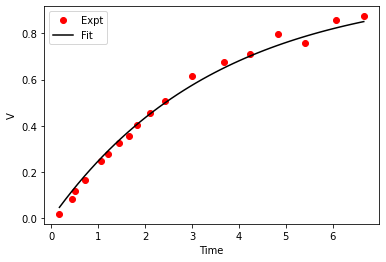

In [12]:
## Fitting theoretical curve to the experimental data
plt.plot(time_exp, V_exp, 'ro')

# heoretical curve
t_min = min(time_exp); t_max = max(time_exp)
time_theory = np.linspace(t_min, t_max, 50)
V_theory = Vfunc(time_theory, 3.5)

ax = plt.gca()
ax.plot(time_theory, V_theory, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('V')
ax.legend(('Expt', 'Fit'))

In [13]:
# Loading data
novickB_data = np.loadtxt('pmls-data/15novick/g149novickB.csv', delimiter=',')

time_exp , W_exp = novickB_data[:,0], novickB_data[:,1]

# Filtering the data
time_exp_filter = time_exp[time_exp <= 10]
W_exp_filter = W_exp[time_exp <=10]

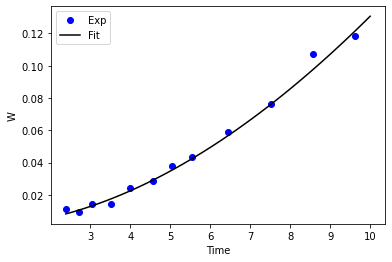

In [14]:
plt.plot(time_exp_filter, W_exp_filter, 'bo')
ax = plt.gca()

time_theory = np.linspace(np.min(time_exp), 10, 50)
W_theory = Wfunc(time_theory, 2, 26)

ax.plot(time_theory, W_theory, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('W')
ax.legend(('Exp', 'Fit'))